In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# projection
def f(X, a):
    return np.matmul(X,a)

## PCA on traffic flow

In [49]:
traffic_flow = pd.read_csv('flow_processed_section.csv')
# print(traffic_flow.describe())
traffic_flow_na = traffic_flow.dropna()
# Drop 'OBJECTID','Name', 
traffic_flow_name = traffic_flow_na.drop(['Direction', 'day 1 2013', 'day 1 2017', 'day 1 2019'], axis=1)
traffic_flow_name = traffic_flow_name[traffic_flow_name.mean(axis=1)>1]
# print(traffic_flow_na.describe())
traffic_flow_name.tail()

,OBJECTID,Name,Day 1 - 2013 - 0:0,Day 1 - 2013 - 0:15,Day 1 - 2013 - 0:30,Day 1 - 2013 - 0:45,Day 1 - 2013 - 1:0,Day 1 - 2013 - 1:15,Day 1 - 2013 - 1:30,Day 1 - 2013 - 1:45,...,Day 3 - 2019 - 21:30,Day 3 - 2019 - 21:45,Day 3 - 2019 - 22:0,Day 3 - 2019 - 22:15,Day 3 - 2019 - 22:30,Day 3 - 2019 - 22:45,Day 3 - 2019 - 23:0,Day 3 - 2019 - 23:15,Day 3 - 2019 - 23:30,Day 3 - 2019 - 23:45
61,205,PeMS Detector 402793,128.0,99.0,108.0,80.0,98.0,74.0,74.0,80.0,...,455,409,373,360,359,357,306,261,269,248
62,206,PeMS Detector 403226,206.0,184.0,189.0,169.0,186.0,155.0,172.0,175.0,...,509,476,487,357,341,277,252,206,220,219
65,209,PeMS Detector 402795,155.0,151.0,133.0,108.0,127.0,101.0,122.0,109.0,...,486,415,419,371,332,307,227,202,233,186
66,210,PeMS Detector 402797,137.0,130.0,118.0,102.0,115.0,98.0,111.0,102.0,...,392,354,338,292,238,226,65,8,35,34
68,212,PeMS Detector 402798,80.0,77.0,69.0,46.0,58.0,44.0,54.0,49.0,...,410,374,367,336,281,248,167,149,180,155


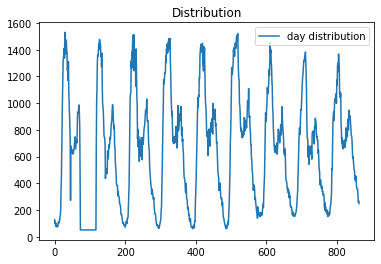

In [50]:
data = traffic_flow_name.tail().to_numpy()[0]
# print(data)
# print(data[2:])


plt.plot(data[2:], label='day distribution')
# plt.plot(score2_2013[:96], label='PC2 score')
# plt.xticks(pos, legend)
plt.legend()
plt.title('Distribution')
plt.show()

In [51]:
# print(traffic_flow_name.tail().to_numpy()[:,2:])
# print()
# print(X.max(axis=0))
# print(X.mean(axis=0))

In [60]:
# remove to each flow the average flow for the time step: centering the data
X = np.array(traffic_flow_name.to_numpy()[:,2:]).T
X_normed = X / X.max(axis=0)
X_bar = X_normed - X_normed.mean(axis=0, dtype='float64')

# X_2017 = np.array(traffic_flow_2017).T
# X_2017_normed = X_2017 / X_2017.max(axis=0)
# X_2017_bar = X_2017_normed - X_2017_normed.mean(axis=0, dtype='float64')

In [61]:
pca_ = PCA()
pca_.fit(X_bar)

# pca_2017 = PCA()
# pca_2017.fit(X_2017_bar)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

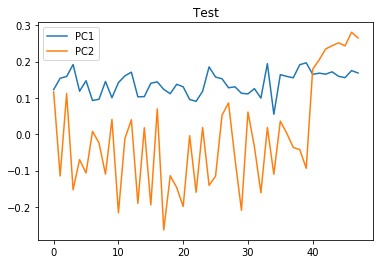

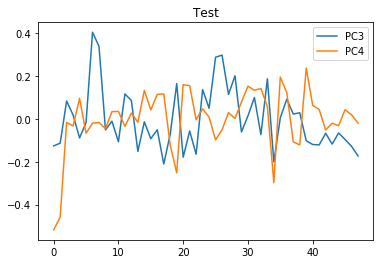

In [63]:
v1 = pca_.components_[0]
v2 = pca_.components_[1]
v3 = pca_.components_[2]
v4 = pca_.components_[3]

plt.plot(v1, label='PC1')
plt.plot(v2, label='PC2')
# plt.plot(v3, label='PC3')
# plt.xticks([index_hw_2013], ['hw'])
plt.legend()
plt.title("Test")
plt.show()

plt.plot(v3, label='PC3')
plt.plot(v4, label='PC4')
plt.legend()
plt.title("Test")
plt.show()


In [68]:
print("Test")
print("Variance along the first principal component: ", np.round(pca_.explained_variance_ratio_[0],2)*100, "%")
print("Variance along the second principal component: ", np.round(pca_.explained_variance_ratio_[1],2)*100, "%")
print("Variance along the second principal component: ", np.round(pca_.explained_variance_ratio_[2],2)*100, "%")
print("Variance along the second principal component: ", np.round(pca_.explained_variance_ratio_[3],2)*100, "%")
print(np.round(pca_.explained_variance_ratio_*100),2)

Test
Variance along the first principal component:  64.0 %
Variance along the second principal component:  14.000000000000002 %
Variance along the second principal component:  6.0 %
Variance along the second principal component:  4.0 %
[64. 14.  6.  4.  3.  2.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 2


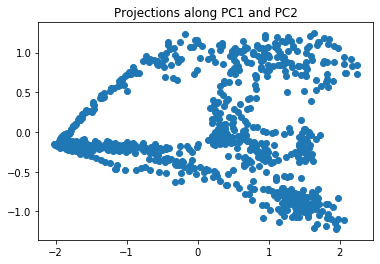

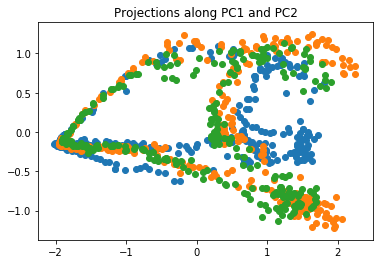

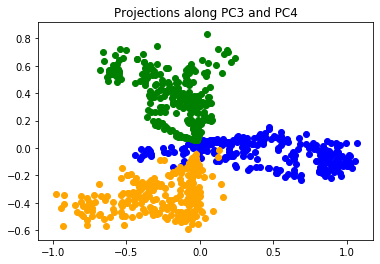

In [96]:
score = np.array([np.dot(X_bar[i,:],v1)  for i in range(864)])
# f(X_bar, v1)
score2 = np.array([np.dot(X_bar[i,:],v2)  for i in range(864)])
# score2 = f(X_bar, v2)

score3 = np.array([np.dot(X_bar[i,:],v3)  for i in range(864)])
score4 = np.array([np.dot(X_bar[i,:],v4)  for i in range(864)])

# score_2017 = f(X_2017_bar, v1_2017)
# score2_2017 = f(X_2017_bar, v2_2017)

plt.scatter(score, score2)
plt.title('Projections along PC1 and PC2')
plt.show()

plt.scatter(score[:288], score2[:288])
plt.scatter(score[289:576], score2[289:576])
plt.scatter(score[577:], score2[577:])
plt.title('Projections along PC1 and PC2')
plt.show()

plt.scatter(score3[:288], score4[:288], color="blue")
plt.scatter(score3[289:576], score4[289:576], color="orange")
plt.scatter(score3[577:], score4[577:], color="green")
plt.title('Projections along PC3 and PC4')
plt.show()

# plt.scatter(score_2017, score2_2017)
# plt.title('2017 Projections along PC1 and PC2')
# plt.show()

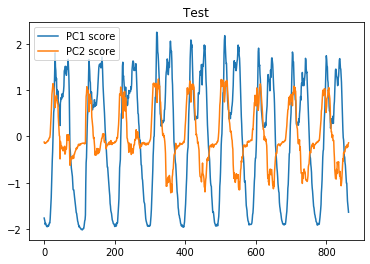

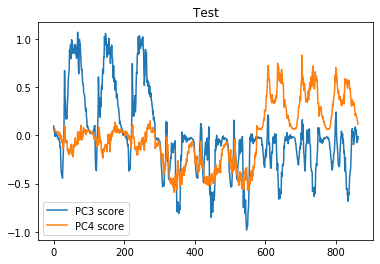

In [86]:
plt.plot(score, label='PC1 score')
plt.plot(score2, label='PC2 score')
# plt.xticks(pos, legend)
plt.legend()
plt.title('Test')
plt.show()

plt.plot(score3, label='PC3 score')
plt.plot(score4, label='PC4 score')
# plt.xticks(pos, legend)
plt.legend()
plt.title('Test')
plt.show()

In [24]:
legend = []
pos = []
for i in range(7):
    pos.append(4*4*i)
    legend.append(str(4*i) + ":00")
print(legend)

['0:00', '4:00', '8:00', '12:00', '16:00', '20:00', '24:00']


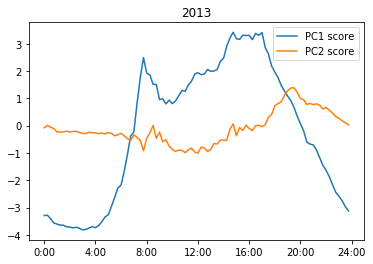

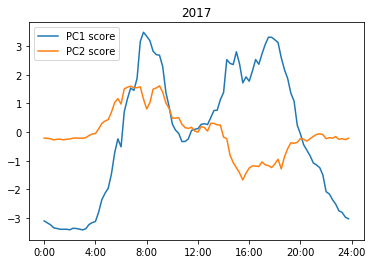

In [10]:
plt.plot(score_[:96], label='PC1 score')
plt.plot(score2_[:96], label='PC2 score')
plt.xticks(pos, legend)
plt.legend()
plt.title('2013')
plt.show()

plt.plot(score_2017[:96], label='PC1 score')
plt.plot(score2_2017[:96], label='PC2 score')
plt.xticks(pos, legend)
plt.legend()
plt.title('2017')
plt.show()

# OLD

In [2]:
traffic_flow = pd.read_csv('Flow_processed.csv')

# Delete 2019 data (need more processing)
index2019 = traffic_flow[traffic_flow['Year'] == 2019].index
traffic_flow.drop(index2019, inplace=True)
traffic_flow.dropna(inplace=True)

traffic_flow_2013 = traffic_flow[traffic_flow['Year'] == 2013]
traffic_flow_2017 = traffic_flow[traffic_flow['Year'] == 2017]

type_road_2013 = []
for l in traffic_flow_2013['Name'].to_numpy():
    if "PeMS" in l:
        type_road_2013.append("HW")
    else:
        type_road_2013.append("L.rd")
# print(type_road)
index_hw_2013 = np.argwhere(np.array(type_road_2013)=='HW')[0][0]

type_road_2017 = []
for l in traffic_flow_2017['Name'].to_numpy():
    if "PeMS" in l:
        type_road_2017.append("HW")
    else:
        type_road_2017.append("L.rd")
# print(type_road)
index_hw_2017 = np.argwhere(np.array(type_road_2017)=='HW')[0][0]

# Remove unnecessary columns for PCA
traffic_flow_2013 = traffic_flow_2013.drop(['Year', 'Name', 'Id', 'Direction', 'Day 1'], axis=1)
traffic_flow_2017 = traffic_flow_2017.drop(['Year', 'Name', 'Id', 'Direction', 'Day 1'], axis=1)
# print(traffic_flow_2013.head())
# print(traffic_flow_2013.describe())

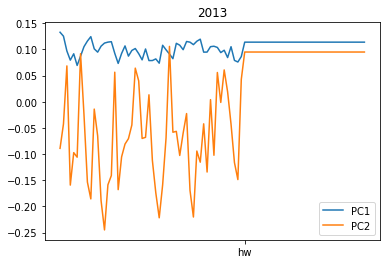

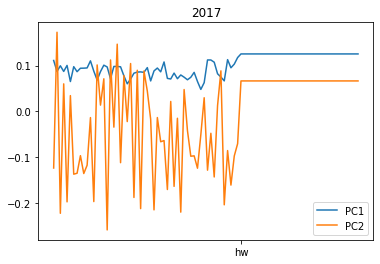

In [6]:
# print(grades_data.columns)
v1_2013 = -pca_2013.components_[0]
v2_2013 = pca_2013.components_[1]
v3_2013 = pca_2013.components_[2]

v1_2017 = pca_2017.components_[0]
v2_2017 = pca_2017.components_[1]
v3_2017 = pca_2017.components_[2]

plt.plot(v1_2013, label='PC1')
plt.plot(v2_2013, label='PC2')
# plt.plot(v3, label='PC3')
plt.xticks([index_hw_2013], ['hw'])
plt.legend()
plt.title("2013")
plt.show()

plt.plot(v1_2017, label='PC1')
plt.plot(v2_2017, label='PC2')
# plt.plot(v3, label='PC3')
plt.xticks([index_hw_2017], ['hw'])
plt.legend()
plt.title("2017")
plt.show()
